## Load and review data

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np 

df = pd.read_excel("P12-Churn-Modelling.xlsx", engine='openpyxl')
df.shape


(10000, 14)

In [88]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [89]:
df.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


## Check Data Type

Change Gender: 1 for Male , 0 for Female

In [105]:
gender_map = {'Male':1,'Female':0}
df['Gender'] = df['Gender'].map(gender_map)
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,1,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,1,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,1,27,2,134603.88,1,1,1,71725.73,0


## Cheick for null values

In [91]:
df.isnull().values.any()

False

([<matplotlib.axis.YTick at 0x1cbcbdb69d0>,
 [Text(0, 0, 'RowNumber'),
  Text(0, 1, 'CustomerId'),
  Text(0, 2, 'CreditScore'),
  Text(0, 3, 'Gender'),
  Text(0, 4, 'Age'),
  Text(0, 5, 'Tenure'),
  Text(0, 6, 'Balance'),
  Text(0, 7, 'NumOfProducts'),
  Text(0, 8, 'HasCrCard'),
  Text(0, 9, 'IsActiveMember'),
  Text(0, 10, 'EstimatedSalary'),
  Text(0, 11, 'Exited')])

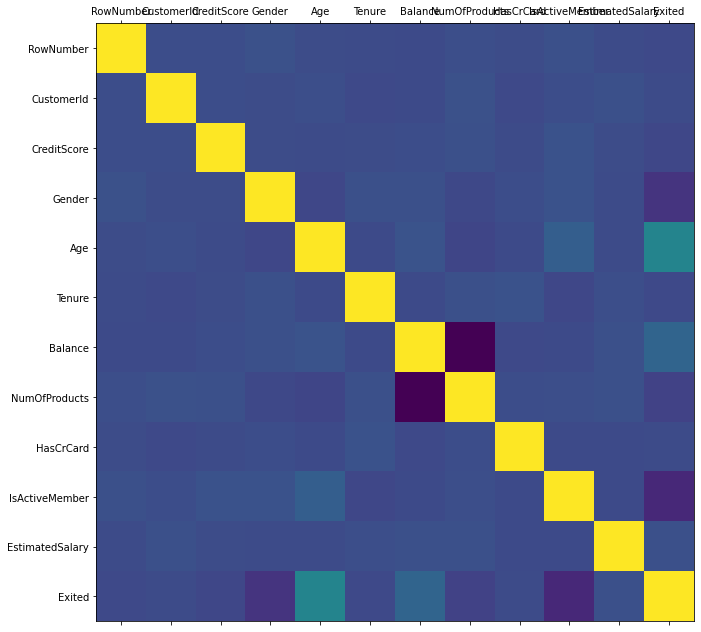

In [92]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(11,11))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

In [93]:
df.corr()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.018196,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Gender,0.018196,-0.002641,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,0.000783,0.009497,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128


## Check Exited true/false ratio

In [94]:
num_true = len(df.loc[df.Exited == True])
num_false = len(df.loc[df.Exited == False])
print("Number of clients exited : {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true+ num_false)) * 100))
print("Number of clients  not exited : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true+ num_false)) * 100))

Number of clients exited : 2037 (20.37%)
Number of clients  not exited : 7963 (79.63%)


## Spliting the data
70% for training | 30% for testing

In [95]:
 from sklearn.model_selection import train_test_split

 feature_col_names = list(df.columns)
 feature_col_names = [ele for ele in feature_col_names if ele not in {'Exited','Surname','Geography'}]
 predicted_class_names = ['Exited']
x = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=split_test_size, random_state=42)

We check to ensure we have the desired 70% train, 30% test split of the data

In [96]:
print("{0:0.2f}% in training set".format((len(x_train)/ len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(x_test)/ len(df.index)) * 100))

70.00% in training set
30.00% in test set


### Verifying predicted value was split correctly

In [97]:
print("Original - Number of clients exited : {0} ({1:0.2f}%)".format(len(df.loc[df.Exited == True]), (len(df.loc[df.Exited == True])/ (len(df.index)) * 100)))
print("Original - Number of clients  not exited : {0} ({1:0.2f}%)".format(len(df.loc[df.Exited == False]), (len(df.loc[df.Exited == 0])/ (len(df.index)) * 100)))
print('--------------------------------------------------------------------------')
print("Training - Number of clients exited : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == True]), (len(y_train[y_train[:] == True])/ (len(y_train)) * 100)))
print("Training - Number of clients exited : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == False]), (len(y_train[y_train[:] == False])/ (len(y_train)) * 100)))
print('--------------------------------------------------------------------------')
print("Test - Number of clients exited : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == True]), (len(y_test[y_test[:] == True])/ (len(y_test)) * 100)))
print("Test - Number of clients exited : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == False]), (len(y_test[y_test[:] == False])/ (len(y_test)) * 100)))

Original - Number of clients exited : 2037 (20.37%)
Original - Number of clients  not exited : 7963 (79.63%)
--------------------------------------------------------------------------
Training - Number of clients exited : 1453 (20.76%)
Training - Number of clients exited : 5547 (79.24%)
--------------------------------------------------------------------------
Test - Number of clients exited : 584 (19.47%)
Test - Number of clients exited : 2416 (80.53%)


## Post-split Data preparation

### Hidden Missing values

In [98]:
df.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0


Are these 0 values possible?

How many rows have unexpected 0 values

In [99]:
print("# rows missing Age: {0}".format(len(df.loc[df.Age ==0])))
print("# rows missing NumOfProducts: {0}".format(len(df.loc[df.NumOfProducts ==0])))
print("# rows missing CustomerId: {0}".format(len(df.loc[df.CustomerId ==0])))
print("# rows missing Gender: {0}".format(len(df.loc[df.Gender ==0])))
print("# rows missing CreditScore: {0}".format(len(df.loc[df.CreditScore ==0])))
print("# rows missing Geography: {0}".format(len(df.loc[df.Geography ==0])))
print("# rows missing EstimatedSalary: {0}".format(len(df.loc[df.EstimatedSalary ==0])))

# rows missing Age: 0
# rows missing NumOfProducts: 0
# rows missing CustomerId: 0
# rows missing Gender: 4543
# rows missing CreditScore: 0
# rows missing Geography: 0
# rows missing EstimatedSalary: 0


## Training initial Algorithm - Naive Bayes

In [100]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train,y_train.ravel())

GaussianNB()

## Performance on Training Data

In [101]:
nb_predict_train = nb_model.predict(x_train)

from sklearn import metrics

print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train,nb_predict_train)))

Accuracy: 0.7813


## Performance on Testing Data


In [106]:
nb_predict_test = nb_model.predict(x_test)
print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test,nb_predict_test)))

Accuracy: 0.7920


## Metrics

In [109]:
print('Confusion Matrix')
print('{0}'.format(metrics.confusion_matrix(y_test, nb_predict_test)))
print('')
print('Classification Report')
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[2333   83]
 [ 541   43]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2416
           1       0.34      0.07      0.12       584

    accuracy                           0.79      3000
   macro avg       0.58      0.52      0.50      3000
weighted avg       0.72      0.79      0.73      3000

